🌟 Exercise 1 : What are Large Language Models (LLMs)?

1.c'est un modèle d'iA entrainé sur des milliards de mots pour comprendre et générer du texte. il apprend à reconnaitre la relation entre les mots et peut prédire le texte suivant ou répondre à des questions. il est utilisé pour la traduction, ecriture, assistants virtuel

In [1]:
# Install necessary libraries
!pip install transformers matplotlib --quiet

In [2]:
# Import required libraries
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
import torch
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
# 2. Charger un modèle pré-entraîné et un tokenizer
model_name = "gpt2"  # GPT-2 est utilisé ici, mais on peut tester d'autres modèles
tokenizer = AutoTokenizer.from_pretrained(model_name)  # Chargement du tokenizer GPT-2
model = AutoModelForCausalLM.from_pretrained(model_name)  # Chargement du modèle GPT-2

print(f"\nModel '{model_name}' loaded successfully!")
print("""
GPT-2 est un modèle de langage causale, ce qui signifie qu'il prédit le mot suivant dans une séquence.
Il a été entraîné sur un grand nombre de textes et peut générer du texte de manière cohérente et contextuelle.
""")

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]


Model 'gpt2' loaded successfully!

GPT-2 est un modèle de langage causale, ce qui signifie qu'il prédit le mot suivant dans une séquence.
Il a été entraîné sur un grand nombre de textes et peut générer du texte de manière cohérente et contextuelle.



🌟 Exercise 2 : Transformer Architecture and Tokenization

la tokenisation permets de découper un texte ou une phrase en petites untités ppelées token (ca peut etre des mots, des morceau de mot)

In [4]:
# 1. Définir un texte d'exemple
text = "i love artificial intelligence."

In [5]:
# 2. Tokeniser le texte
tokens = tokenizer.tokenize(text)  # Découpe le texte en tokens
token_ids = tokenizer.convert_tokens_to_ids(tokens)  # Convertit les tokens en nombres

In [6]:
# Afficher les résultats
print(f"Original Text: {text}")
print(f"Tokens: {tokens}")
print(f"Token IDs: {token_ids}")

Original Text: i love artificial intelligence.
Tokens: ['i', 'Ġlove', 'Ġartificial', 'Ġintelligence', '.']
Token IDs: [72, 1842, 11666, 4430, 13]


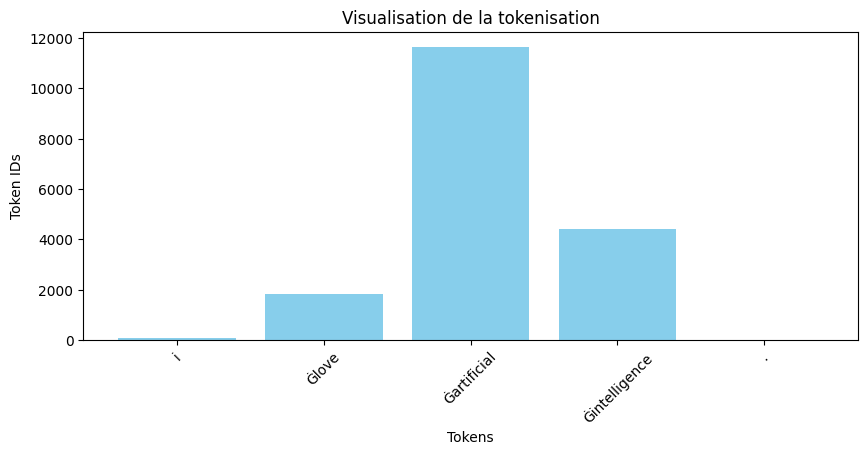

In [7]:
# 3. Visualiser le processus de tokenisation
plt.figure(figsize=(10, 4))
plt.bar(tokens, token_ids, color="skyblue")
plt.xlabel("Tokens")
plt.ylabel("Token IDs")
plt.title("Visualisation de la tokenisation")
plt.xticks(rotation=45)
plt.show()

🌟 Exercise 3 : Understanding Token IDs and Special Prefixes

In [8]:
# Afficher les ID des tokens
for token, token_id in zip(tokens, token_ids):
    print(f"Token: {token.ljust(15)} | ID: {token_id}")

Token: i               | ID: 72
Token: Ġlove           | ID: 1842
Token: Ġartificial     | ID: 11666
Token: Ġintelligence   | ID: 4430
Token: .               | ID: 13


Dans GPT-2 et d’autres modèles Transformer, le préfixe Ġ signifie qu’un mot commence par un espace dans le texte original.
permet de faire la différence entre "Hello world" et "Helloworld"

🌟 Exercise 4 : Pretraining vs. Fine-Tuning

In [ ]:
pré entrainement : entraine le modèle sur des milliers de mots et de textes.
fine tuning : adapte le modèle à uen tache précise.

🌟 Exercise 5 : Generate Simple Text

In [9]:
# Définir un texte d'entrée
input_text = "l'intelligence artificielle est "

In [10]:
# Tokeniser l'entrée utilisateur
inputs = tokenizer(input_text, return_tensors="pt")

In [11]:
# Générer du texte avec le modèle GPT-2
output = model.generate(**inputs, max_length=50, temperature=0.7, top_k=50, top_p=0.9, do_sample=True)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [12]:
# Récupérer les ID des tokens générés
output_ids = output[0]

In [13]:
# Décoder la sortie en texte lisible
output_text = tokenizer.decode(output_ids, skip_special_tokens=True)

In [15]:
# Afficher les résultats
print(f"\nInput: {input_text}")
print(f" Token IDs: {output_ids.tolist()}")  # Convertir en liste pour affichage
print(f"Generated Output: {output_text}")


Input: l'intelligence artificielle est 
 Token IDs: [75, 6, 32683, 29829, 8207, 293, 1556, 220, 25125, 2634, 748, 299, 280, 303, 14644, 299, 280, 303, 14644, 11, 2123, 269, 5857, 220, 25125, 2634, 748, 299, 280, 303, 14644, 299, 280, 303, 14644, 11, 2123, 269, 5857, 220, 25125, 2634, 748, 299, 280, 303, 14644, 299, 280, 303]
Generated Output: l'intelligence artificielle est été des nouveaux nouveaux, et cette été des nouveaux nouveaux, et cette été des nouveaux nouve


In [16]:
# Définir un texte d'entrée
input_text = "The future of artificial intelligence is"

# Tokeniser l'entrée utilisateur
inputs = tokenizer(input_text, return_tensors="pt")

# Générer du texte avec le modèle GPT-2
output = model.generate(**inputs, max_length=50, temperature=0.7, top_k=50, top_p=0.9, do_sample=True)

# Récupérer les ID des tokens générés
output_ids = output[0]

# Décoder la sortie en texte lisible
output_text = tokenizer.decode(output_ids, skip_special_tokens=True)

# Afficher les résultats
print(f"\n📥 Input: {input_text}")
print(f"📊 Token IDs: {output_ids.tolist()}")  # Convertir en liste pour affichage
print(f"✨ Generated Output: {output_text}")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



📥 Input: The future of artificial intelligence is
📊 Token IDs: [464, 2003, 286, 11666, 4430, 318, 257, 1256, 517, 8253, 621, 262, 530, 356, 821, 3058, 4379, 1909, 13, 198, 198, 2504, 338, 780, 11, 1864, 284, 262, 3452, 2267, 416, 19764, 290, 262, 2351, 5136, 286, 20130, 290, 8987, 357, 45, 8808, 828, 257, 649, 2099, 286, 14492, 1080]
✨ Generated Output: The future of artificial intelligence is a lot more complicated than the one we're currently seeing today.

That's because, according to the latest research by IBM and the National Institute of Standards and Technology (NIST), a new type of computing system


le modèle GPT-2 est plus cohérent dans la génération de texte en anglais qu'en francais.